**Credit Card Fraud Detection**

---
This model will help to recognize fraudent credit card transaction , so that customers are not charged for the items that they have not purchased.


In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [7]:
#Importing the dataset from the  csv file
data=pd.read_csv('/content/creditcard.csv')
data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
77008,56841.0,1.137066,0.198191,0.487977,1.290505,-0.399763,-0.607979,0.018824,-0.033684,0.096579,0.040594,-0.061494,-0.122744,-0.945553,0.560406,1.267106,-0.193082,-0.023509,-0.509760,-0.954792,-0.210377,0.118273,0.344390,-0.041974,0.392513,0.520993,-0.270156,0.026225,0.022775,19.90,0.0
72778,54854.0,1.074413,-0.218444,0.621600,-0.200875,-0.138312,0.818131,-0.533301,0.408467,0.347610,-0.405675,1.033836,0.733628,0.049133,0.259668,2.310710,-0.958433,0.956446,-2.477004,-1.646190,-0.210919,0.007529,0.188536,0.264356,-0.584891,-0.239169,1.013203,0.001636,-0.002091,1.69,0.0
153549,99410.0,-1.990375,1.993107,2.809257,4.318494,-0.659549,1.073989,-0.559037,0.323636,1.654405,3.149553,-0.380589,-4.529612,-0.243285,0.782775,1.032213,0.425087,0.582722,1.301665,0.492717,0.901704,-0.270491,0.325413,-0.114781,-0.096169,0.216496,0.536471,0.838684,0.398057,0.97,0.0
84904,60512.0,-1.070322,1.218168,2.559825,0.657219,0.772074,0.058858,1.055657,-0.125679,-1.035473,-0.147682,-0.434903,0.106672,0.840457,-0.513239,-0.313461,0.944797,-1.202607,-0.591610,-3.042283,-0.171756,0.193171,0.606669,-0.423391,0.095063,0.567516,-0.137320,-0.284825,-0.161542,6.42,0.0
94282,64814.0,-0.821480,1.148243,1.641268,2.214619,0.379240,0.084930,0.703286,0.026994,-1.238617,0.597985,-0.482550,-0.687028,-0.643360,0.365526,1.001141,0.057233,-0.066984,-0.577419,-0.434576,-0.121994,-0.047947,-0.277795,0.070772,0.027393,-0.469333,-0.153918,-0.149963,0.198673,37.00,0.0


In [3]:
#Identifying any NAN value in dataset
data.isnull().sum(axis=0)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [18]:
#Replacing NAN values with required values
data['Class']=data['Class'].fillna(0)
items=data.columns
for item in items:
  if item!='Class':
    data[item]=data[item].fillna(data[item].mean())

  

data.isnull().sum(axis=0)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [19]:
#Describing the data
print("Shape of the Data:", data.shape)
print("Description of the data:")
print(data.describe())

Shape of the Data: (156612, 31)
Description of the data:
                Time             V1  ...         Amount          Class
count  156612.000000  156612.000000  ...  156612.000000  156612.000000
mean    56114.721286      -0.226386  ...      88.193486       0.002235
std     23396.766143       1.845422  ...     246.282347       0.047221
min         0.000000     -56.407510  ...       0.000000       0.000000
25%     39715.750000      -1.015986  ...       5.850000       0.000000
50%     57468.500000      -0.252679  ...      22.060000       0.000000
75%     74684.000000       1.167918  ...      78.000000       0.000000
max    108499.000000       2.439207  ...   19656.530000       1.000000

[8 rows x 31 columns]


In [20]:
#Determine the number of fraud cases
fraud=data[data['Class']==1]
valid=data[data['Class']==0]
OutlierFraction=len(fraud)/float(len(valid))
print("Number of fraud cases as compared to valid cases:", OutlierFraction)
print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))

Number of fraud cases as compared to valid cases: 0.002239827981211043
Fraud Cases: 350
Valid Cases: 156262


In [21]:
#Details of Fraudulent transaction
print("Amount details of Fraudulent Transaction:")
fraud.Amount.describe()

Amount details of Fraudulent Transaction:


count     350.000000
mean      111.344486
std       228.490673
min         0.000000
25%         1.000000
50%         9.905000
75%       101.500000
max      1809.680000
Name: Amount, dtype: float64

In [22]:
#Details of Valid Transaction
print("Amount details of Valid Transaction:")
valid.Amount.describe()

Amount details of Valid Transaction:


count    156262.000000
mean         88.141632
std         246.318991
min           0.000000
25%           5.900000
50%          22.080000
75%          77.980000
max       19656.530000
Name: Amount, dtype: float64

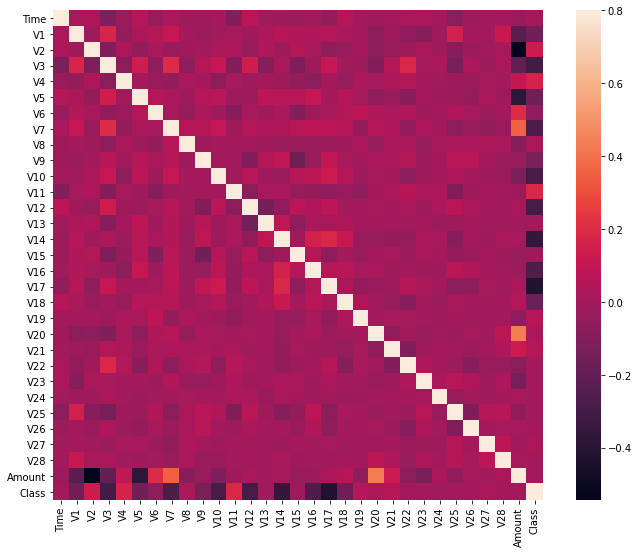

In [23]:
#Correlation matrix for given dataset
corrmat=data.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.8,square=True)
plt.show()

In [24]:
#Creating X and y labels using the dataset
X=data.drop(['Class'],axis=1)
Y=data['Class']
print("Shape of X:", X.shape)
print("Shape of Y:" , Y.shape)

xData=X.values
yData=Y.values

Shape of X: (156612, 30)
Shape of Y: (156612,)


In [25]:
#Using Skicit-learn to split data into training and testing data
from sklearn.model_selection import train_test_split

#Spliting the data into training and testing data
xTrain,xTest,yTrain,yTest=train_test_split(xData,yData,test_size=0.2,random_state=42)

print("Shape of Training Data:",xTrain.shape)
print("Shape of Testing Data:",xTest.shape)

Shape of Training Data: (125289, 30)
Shape of Testing Data: (31323, 30)


In [26]:
#Building a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
#Random forest model creation
rfc=RandomForestClassifier()
rfc.fit(xTrain,yTrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
#Predicting on Test set using above trained models
yPred=rfc.predict(xTest)

In [29]:
#Evaluating the Random Forest Classifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud) 
n_errors = (yPred != yTest).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(yTest, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(yTest, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(yTest, yPred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(yTest, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(yTest, yPred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 

The model used is Random Forest classifier
The accuracy is 0.9996168949334355
The precision is 0.9137931034482759
The recall is 0.8833333333333333
The F1-Score is 0.8983050847457628
The Matthews correlation coefficient is0.8982427433705649
